#computer vision

 It involves developing algorithms and techniques to help computers gain high-level understanding from digital images or videos.

By using convolution neural networks - in the domain of pictures

We can also perform binary and multiclass classification in Computer Vision.

Applications of Computer Vision:
* used for object detection , segmentation --> sections of an image
* tesla computer vision --> they have 8 cameras on the their self driving cars, they use computer vision to understand their images,they turn images into the vector spaces.
* tesla uses PyTorch to train their machine learning models.
* another thing is that tesla FSD breaks uses computer vision.

In [116]:
#computer vision inputs and outputs

w=224
h=224
c=3  #colour channels r,g,b

# Steps :

1. convert to numerical encoding, then to predicted output and then to actual output
2. the numerical encoded inputs are given to the algorithm and the output of the algorithm are actually the predicted outputs.
3. the algorithm that usually does this conversion is the CNN or the Convolutinal Neural Network
--> CNN works the best with the image data. There are differnt types of neural networks other than CNN as well.

if we encode any image, we might have 'batch_size , width, height, color channels'. these can vary

shape = [32 , 224 ,224 , 3]

then we have the output shape of 3 because in this example, we have 3 classes.

Note: we can have color channels first and color channels last, different libraries take different order but in the long term, we can use color channels last.

#what is a CNN?

--> architectures that are pretty good at recognising patterns in the images.

#architecture of a CNN:

1. input image
2. input layer --> takes in target images and preprocesses them for further layers
3. convolution layer --> learns the most important layers
4. hidden activation layers --> add non-linearity to the learned features
5. pooling layers --> reduces the dimensionality of learned image features
6. output layers/ linear layer --> takes learned features and outputs them in shape of target labels
7. output activation --> coverts the output logits to the predicted probabilities


# computer vision libraries in Pytorch


1. torchvision --> base domain library for CV
2. torchvision.Datasets --> get datasets and dataloading functions for CV
3. torchvision.models --> get pretrained CV models
4. torchvision.transforms --> functions for manipulating your vision data to be suitable for use.
5. torch.utils.data.Dataset --> base dataset class for PyTorch
6. torch.utils.data.DataLoader --> creates Python iterable over a dataset.



#FashionMNIST dataset

In [117]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [118]:
#using the built-in dataset

#setup the training data
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root = "data", #where to download the data to--
    train = True, #do we want the training dataset, if False we get the testing dataset
    download = True, #to get the dataset
    transform = torchvision.transforms.ToTensor(), #convert the data to tensors
    target_transform = None #how we want to transform the labels/targets
)


test_data = datasets.FashionMNIST(
    root="data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [119]:
#checking out the parameters or the attributes of the data
len(train_data) , len(test_data)

(60000, 10000)

In [120]:
#see the first training example
image , label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [121]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [122]:
class_to_index = train_data.class_to_idx #map class labels (or categories) to their corresponding indices
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [123]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [124]:
#checking the shape of the image
image.shape , label #label is associated with the category

(torch.Size([1, 28, 28]), 9)

--> reason why cant we access the shape of the label directly: Integers do not have shapes because they are scalar values representing single data points.


In [126]:
print(f'image shape is: {image.shape} --> [color channel, height, width]')
print(f'image label is: {class_names[label]}')

image shape is: torch.Size([1, 28, 28]) --> [color channel, height, width]
image label is: Ankle boot


#visualising the data


In [127]:
image , label = train_data[0]
print(f'image shape: {image.shape}')

image shape: torch.Size([1, 28, 28])


--> Pytorch expects the color channel in the last position/index.

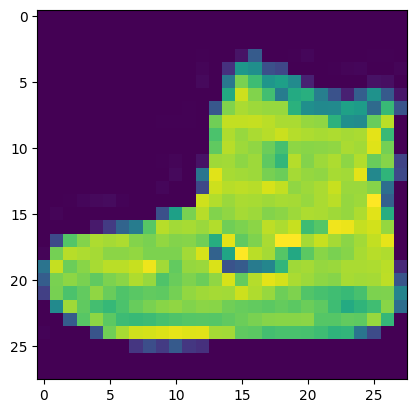

In [129]:
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

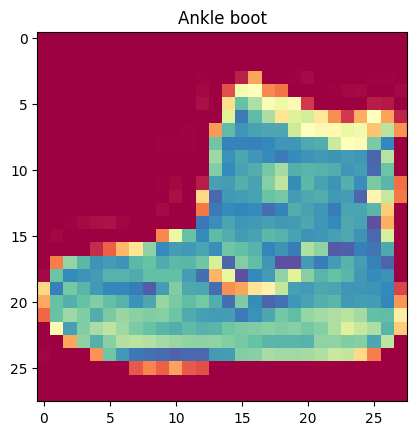

In [130]:
plt.imshow(image.squeeze() , cmap = 'Spectral')
plt.title(class_names[label])
plt.axis(True)

10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572
29315
48295
48567
24706


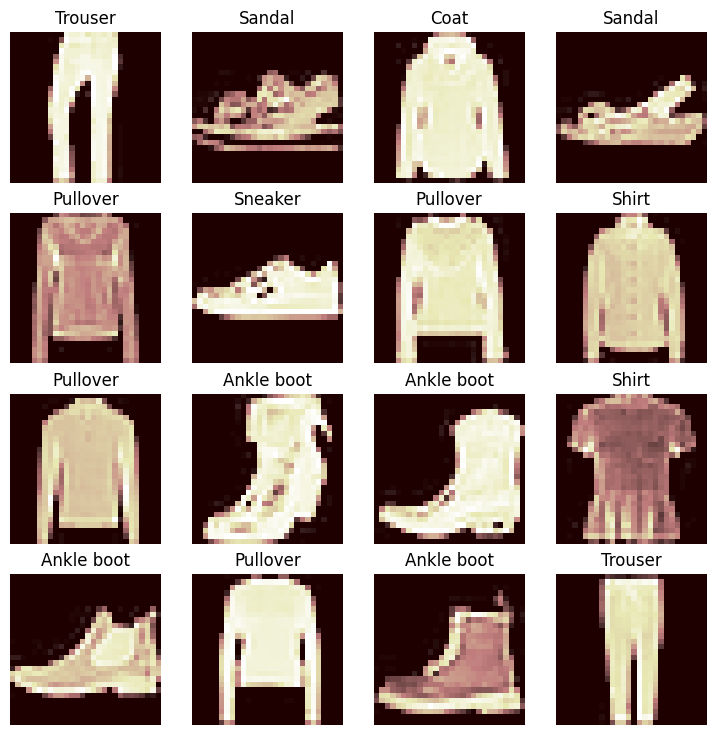

In [131]:
#to plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows , cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data) , size=[1]).item() # The size=[1] argument specifies that a single random integer should be generated. .item() is used to extract the randomly generated integer value
  print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="pink")
  plt.title(class_names[label])
  plt.axis(False)

#do these items could be modelled with linear lines or non-linearity?


In [133]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

* right now the data is in the form of PyTorch datasets
* dataloader turns our dataset into a python iterable.
* more specifically, we want to turn our data into mini-batches


#why do we need batches?
--> because we want our model to look at all the 60,000 images and learn because its a small dataset in the domain of Deep Learning.




#reasons for making batches:-

1. it is more computationally efficient, the computer might not be able to look at 60000 images in one hit.
So, we break the data to 32 images at a time, called batch size.

2. it gives our neural network more chances to update its gradient per epoch.
 this makes the NN update every 32 images instead of every 60,000 images.


#prepare the dataloader


In [135]:

from torch.utils.data import DataLoader

batch_size = 32 #setup the batch size hyperparameter

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=batch_size,
                              shuffle=True) #for randomness

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=batch_size,
                             shuffle=False)

train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x796e80957ac0>,
 <torch.utils.data.dataloader.DataLoader at 0x796e80954970>)

In [136]:
#to check what we have created
print(f'Dataloaders: {train_dataloader , test_dataloader}')
print(f'Length of the training dataloader is: {len(train_dataloader)} with batches of {batch_size}')
print(f'Length of the testing dataloader is: {len(test_dataloader)} with batches of {batch_size}')


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x796e80957ac0>, <torch.utils.data.dataloader.DataLoader object at 0x796e80954970>)
Length of the training dataloader is: 1875 with batches of 32
Length of the testing dataloader is: 313 with batches of 32


In [137]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

* the iter helps you to iterate over the batches and the next helps you to retrieve the next item from the iterator

* we have tensor with 32 samples with dimensions and 32 labels associated with the 32 samples.

#getting a random sample


image size: torch.Size([1, 28, 28])
label: 4 , label size: torch.Size([])


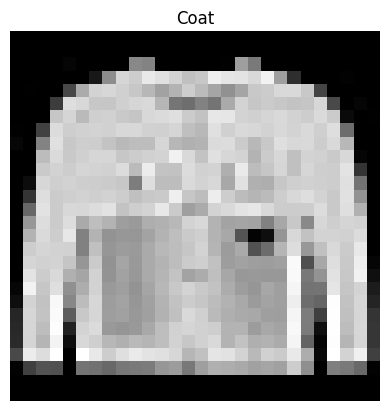

In [140]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch) , size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f'image size: {img.shape}')
print(f'label: {label} , label size: {label.shape}')

* so now, we have 1875 batches of 32 images each instead of 60,000 images


#building a baseline model

--> a baseline model is a simple model we try to improve with some experiments.


--> or in simple terms, start and then add complexity when necessary

In [143]:
#create a flatten layer -->a flatten layer is a type of layer that is used to reshape the input data into a one-dimensional array
flatten_model = nn.Flatten()

#get a single sample
x = train_features_batch[0]
x.shape

#now lets flatten the sample
output = flatten_model(x)

print(f'shape before flattening: {x.shape}, it consisted of [color_channels, height, width]')
print(f'shape after flattening: {output.shape}, it now consists of [color_channels, height*wodth]')

shape before flattening: torch.Size([1, 28, 28]), it consisted of [color_channels, height, width]
shape after flattening: torch.Size([1, 784]), it now consists of [color_channels, height*wodth]


* Once the input data has been flattened, it can be passed as input to the fully connected layers of the neural network.

*  we had done flattening because we want to use a linear layer as the baseline model.

* the linear layer cannot handle multi-dimensional data like our images, so we wanted to have a single vector as our input  


In [146]:
from torch import nn
class FashionMNISTModel(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)




In [147]:
torch.manual_seed(42)

model0 = FashionMNISTModel(
    input_shape = 784,  #28*28
    hidden_units = 10,
    output_shape=len(class_names) #one for every class
).to('cpu')

model0

FashionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [148]:
trial = torch.rand([1,1,28,28])
model0(trial)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

--> if we remove the 0th layer from the layer i.e the Flatten layer we get the error in the trial saying mat1 and mat2 cannot be multiplied

#Metrics for the model:

1. LOSS FN --> since we are working with multiclass data, loss fn will be 'CrossEntropyLoss()'
2. OPTIMZER --> torch.optim.SGD
3. EVALUATION METRIC --> accuracy
'''

#importing helper functions


In [151]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('helper function already exists, skipping download...')
else:
  print('Downloading the helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

helper function already exists, skipping download...


In [152]:
#import the accuracy metric from the file
from helper_functions import accuracy_fn

#set up the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model0.parameters(),
                            lr=0.1)

In [ ]:
'''def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc'''

In [ ]:
'''import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary


    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())'''

#creating a function to time our experiments

two main things we want to track:

1. models performance(loss and acc)
2. how fast it runs



In [156]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end:float,
                     device: torch.device = None):
  #prints the diff b/w start and stop time
  total_time = end - start
  print(f'train time on {device}: {total_time:.3f} seconds')
  return total_time

In [157]:
start_time = timer()

end_time = timer()
print_train_time(start=start_time , end=end_time, device='cpu')

train time on cpu: 0.000 seconds


5.806999979540706e-05

#training loop


1. loop through epochs
2. loop through training batches,  perform training steps, calculate the loss per batch.
3. loop through testing batches, perform testing steps, calculate the test loss per batch.
4. print out everything
5. time it all


In [159]:
#import tqdm for progress bar
from tqdm.auto import tqdm

#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#set the number of epochs
epochs = 3

#create a training and testing loop
for epoch in tqdm(range(epochs)):
  print(f'epoch: {epoch}\n------')

  ####training
  train_loss = 0 #cumulating values
  #add a loop to loop through training batches
  for batch, (x,y) in enumerate(train_dataloader): #x is the image and y is the label
    model0.train()
    #1. forward pass
    y_pred = model0(x)

    #2. calculate the loss (per batch)
    loss = loss_fn(y_pred , y)
    train_loss+= loss #to add loss of every batch

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()

    if batch%400 == 0:
       print(f'looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples.')

  #divide total train loss by length of the train dataloader
  train_loss /= len(train_dataloader)


  ###testing
  test_loss , test_acc = 0,0
  model0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:

      #1. forward pass
      test_pred = model0(x_test)

      #2. calculate the loss
      test_loss+= loss_fn(test_pred , y_test)

      #3. calculate the accuracy
      test_acc+= accuracy_fn(y_true= y_test, y_pred = test_pred.argmax(dim=1))

    #calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    #calculate the test acc average per batch
    test_acc/=len(test_dataloader)

  #print out everything
  print(f'\ntrain loss: {train_loss:.4f} | test loss:{test_loss:.4f} | test acc : {test_acc:.4f}%')

#calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model0 = print_train_time(start = train_time_start_on_cpu,
                                           end = train_time_end_on_cpu,
                                           device = str(next(model0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

train loss: 0.5904 | test loss:0.5095 | test acc : 82.0387%
epoch: 1
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

train loss: 0.4763 | test loss:0.4799 | test acc : 83.1969%
epoch: 2
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

train loss: 0.4550 | test loss:0.4766 | test acc : 83.4265%
train time on cpu: 32.266 seconds


#making predictions and getting model results


In [160]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  #returns a dict containing the results of the model predictions on data_loader
  loss ,  acc = 0 , 0
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(data_loader):
      y_pred = model(x)  #predictions

      loss += loss_fn(y_pred , y)
      acc+= accuracy_fn(y_true=y,
                        y_pred=y_pred.argmax(dim=1))

    #scale loss and acc to find the average loss and acc per batch
    loss/= len(data_loader)
    acc/= len(data_loader)

  return {'model_name:' : model.__class__.__name__,
          'model_loss:' : loss.item(),
          'model_acc:' : acc}

#calculate results
model0_results = eval_model(model=model0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model0_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name:': 'FashionMNISTModel',
 'model_loss:': 0.47663894295692444,
 'model_acc:': 83.42651757188499}